<a href="https://colab.research.google.com/github/lcalderon-aceituno/PS353-SP22-HW/blob/main/HW4_5_53_Advanced_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.53 An oscillator is driven by the periodic force of Problem 5.49 with period $\tau = 2$. (a) Find the long-term motion x(t), assuming the following parameters: natural period $\tau_0 = 2$, $w_0 = \pi$, damping parameter $\beta = 0.1$, and max drive strength $f_max = 1$. Find the coefficients in the Fourier series for x(t) and plot the sum of the first four terms in the series for $0<= t <= 6$. (b) Repeat, except wiht natural period equal to 3. 

In [21]:
!pip install whit-phys-util

In [22]:
from sympy import *
from sympy.plotting import plot
from sympy import And

In [23]:
import whit_phys_util as buc

# The driving function

Our driving function is
$$
  f(t) = \begin{cases} |t - 1| & 0 < t < 2 \\ |t - 3| & 2 < t < 4 \\ |t-5| & 4 < t < 6 \end{cases}
$$

In [24]:
tau = 2
omega = 2*pi/tau
fmax = 1

In [33]:
var('t') # create variable t
f = Piecewise( (abs(t + 1), And(-2 < t, t<0)), (abs(t - 1), And(0 < t, t < 2)), (abs(t - 3), And(2 < t, t<4)),(abs(t - 5), And(4 < t, t<6)))
f

Piecewise((Abs(t + 1), (t > -2) & (t < 0)), (Abs(t - 1), (t > 0) & (t < 2)), (Abs(t - 3), (t > 2) & (t < 4)), (Abs(t - 5), (t > 4) & (t < 6)))

Now that we have a symbolic representation, we can plot to check that it matches the function given in the problem:

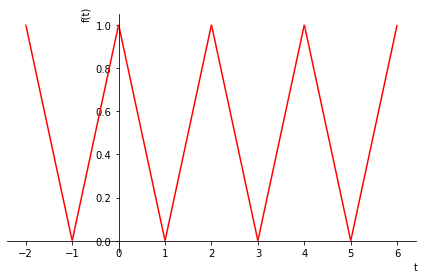

In [34]:
fig1 = plot(f, line_color="red",label="exact"); # create a plot of the graph to check it matches the problem given

Before calculating the response, we first have to find the Fourier representation of the driving function.

Here we have the initial term $f_0$:
$$f_0 = \frac{1}{\tau} \int\limits_{-\tau/2}^{+\tau/2} f(t)\,dt$$

Then the infinite summation representing $f$:
$$f_n = \frac{2}{\tau}\int\limits_{-\tau/2}^{+\tau/2} cos(n \omega t) f(t) \,dt$$

And finally an approximation of $f$:
$$f_{approx} = f_0 + ∑f_n cos(n \omega t)$$

In [35]:
var('n', integer=True, positive=True)

f0 = integrate((1/tau)*f, (t, -tau/2, tau/2))

def fn(n):
  return integrate(2/tau*cos(n*omega*t)*f, (t, -tau/2, tau/2))

def f_approx(nmax, t):
  f_sym = f0 + Sum(fn(n)*cos(n*omega*t), (n, 1, nmax))
  return f_sym.doit()

To check our representation, we can plot some of the approximations against $f$

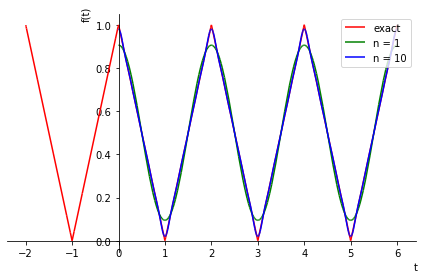

In [36]:
fig2 = plot(f_approx(1, t), (t, 0, 6), show = False, line_color="green", label="n = 1")
fig3 = plot(f_approx(10, t), (t, 0, 6), show = False, line_color="blue", label="n = 10")
fig1.legend = True
fig1.extend(fig2)
fig1.extend(fig3)
fig1.show()

# Response

## Part a

In [29]:
tau0 = 2
omega0 = pi
beta = 0.1

We can now calculate the $\delta_n$ and $A_n$ terms for graphing the response.

In [37]:
a0 = f0/omega0**2
def a(n):
  return fn(n)/sqrt((omega0**2 - n**2*omega**2)**2 + 4*beta**2*n**2*omega**2)

def delta(n):
  return atan2(2*beta*n*omega, omega0**2 - n**2*omega**2)

def x(nmax, t):
  sym_x = a0 + Sum(a(n)*cos(n*omega*t-delta(n)), (n, 1, nmax))
  return sym_x.doit()

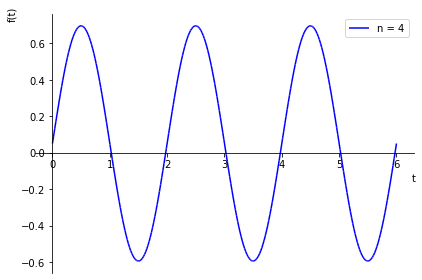

In [38]:
fig4 = plot(x(4, t), (t, 0, 6), line_color = 'blue', label='n = 4', show = False, adaptive=False)
fig4.legend = True
fig4.show()

## Part b

In [40]:
tau0b = 3 # change natural period to 3
omega0b = 2*pi/tau0b

In [42]:
a0b = f0/omega0b**2
def a(n):
  return fn(n)/sqrt((omega0b**2 - n**2*omega**2)**2 + 4*beta**2*n**2*omega**2)

def delta(n):
  return atan2(2*beta*n*omega, omega0b**2 - n**2*omega**2)

def x(nmax, t):
  sym_x = a0 + Sum(a(n)*cos(n*omega*t-delta(n)), (n, 1, nmax))
  return sym_x.doit()

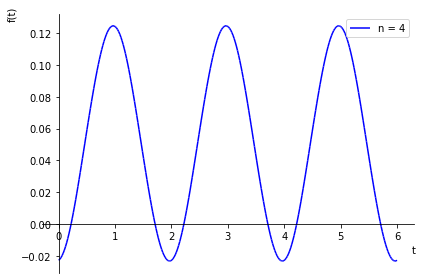

In [43]:
fig5 = plot(x(4, t), (t, 0, 6), line_color = 'blue', label='n = 4', show = False, adaptive=False)
fig5.legend = True
fig5.show()